In [ ]:
import streamlit as st
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("./../../data/_data.csv")
plt.rcParams["font.size"] = 14  # Увеличиваем размер шрифта
plt.style.use("default")

## Сбор данных для построения распределения объявлений по округам Москвы

In [5]:
# Данные по станциям метро собрал DeepSeek, нужно проверять

metro = df.iloc[::, [1, 4]].copy()

metro_stations = {
    # Сокольническая линия (1)
    "Бульвар Рокоссовского": "ВАО",
    "Черкизовская": "ВАО",
    "Преображенская площадь": "ВАО",
    "Сокольники": "ВАО",
    "Красносельская": "ЦАО",
    "Комсомольская": "ЦАО",
    "Красные Ворота": "ЦАО",
    "Чистые пруды": "ЦАО",
    "Лубянка": "ЦАО",
    "Охотный Ряд": "ЦАО",
    "Библиотека им. Ленина": "ЦАО",
    "Кропоткинская": "ЦАО",
    "Парк культуры (Сокольническая)": "ЦАО",
    "Фрунзенская": "ЦАО",
    "Спортивная": "ЗАО",
    "Воробьёвы горы": "ЗАО",
    "Университет": "ЗАО",
    "Проспект Вернадского": "ЗАО",
    "Юго-Западная": "ЗАО",
    "Тропарёво": "ЗАО",
    "Румянцево": "ТиНАО",
    "Саларьево": "ТиНАО",
    "Филатов Луг": "ТиНАО",
    "Прокшино": "ТиНАО",
    "Ольховая": "ТиНАО",
    "Коммунарка": "ТиНАО",
    # Замоскворецкая линия (2)
    "Ховрино": "САО",
    "Беломорская": "САО",
    "Речной вокзал": "САО",
    "Водный стадион": "САО",
    "Войковская": "САО",
    "Сокол": "САО",
    "Аэропорт": "САО",
    "Динамо": "САО",
    "Белорусская": "ЦАО",
    "Маяковская": "ЦАО",
    "Тверская": "ЦАО",
    "Театральная": "ЦАО",
    "Новокузнецкая": "ЦАО",
    "Павелецкая": "ЦАО",
    "Автозаводская": "ЮАО",
    "Технопарк": "ЮАО",
    "Коломенская": "ЮАО",
    "Каширская": "ЮАО",
    "Кантемировская": "ЮАО",
    "Царицыно": "ЮАО",
    "Орехово": "ЮАО",
    "Домодедовская": "ЮАО",
    "Красногвардейская": "ЮАО",
    "Алма-Атинская": "ЮАО",
    # Арбатско-Покровская линия (3)
    "Пятницкое шоссе": "СЗАО",
    "Митино": "СЗАО",
    "Волоколамская": "СЗАО",
    "Мякинино": "МО (Красногорск)",
    "Строгино": "СЗАО",
    "Крылатское": "ЗАО",
    "Молодёжная": "ЗАО",
    "Кунцевская": "ЗАО",
    "Славянский бульвар": "ЗАО",
    "Парк Победы": "ЗАО",
    "Киевская": "ЗАО",
    "Смоленская": "ЦАО",
    "Арбатская": "ЦАО",
    "Площадь Революции": "ЦАО",
    "Курская": "ЦАО",
    "Бауманская": "ЦАО",
    "Электрозаводская": "ВАО",
    "Семёновская": "ВАО",
    "Партизанская": "ВАО",
    "Измайловская": "ВАО",
    "Первомайская": "ВАО",
    "Щелковская": "ВАО",
    # Филёвская линия (4)
    "Кунцевская": "ЗАО",
    "Пионерская": "ЗАО",
    "Филёвский парк": "ЗАО",
    "Багратионовская": "ЗАО",
    "Фили": "ЗАО",
    "Кутузовская": "ЗАО",
    "Студенческая": "ЗАО",
    "Киевская": "ЦАО",
    "Смоленская": "ЦАО",
    "Александровский сад": "ЦАО",
    "Арбатская (Филёвская)": "ЦАО",
    "Выставочная": "ЦАО",
    "Международная": "ЦАО",
    # Кольцевая линия (5)
    "Парк культуры": "ЦАО",
    "Киевская": "ЦАО",
    "Краснопресненская": "ЦАО",
    "Белорусская": "ЦАО",
    "Новослободская": "ЦАО",
    "Проспект Мира": "ЦАО",
    "Комсомольская": "ЦАО",
    "Курская": "ЦАО",
    "Таганская": "ЦАО",
    "Павелецкая": "ЦАО",
    "Добрынинская": "ЦАО",
    "Октябрьская": "ЦАО",
    # Калужско-Рижская линия (6)
    "Медведково": "СВАО",
    "Бабушкинская": "СВАО",
    "Свиблово": "СВАО",
    "Ботанический сад": "СВАО",
    "ВДНХ": "СВАО",
    "Алексеевская": "СВАО",
    "Рижская": "СВАО",
    "Проспект Мира": "ЦАО",
    "Сухаревская": "ЦАО",
    "Тургеневская": "ЦАО",
    "Китай-город": "ЦАО",
    "Третьяковская": "ЦАО",
    "Октябрьская": "ЦАО",
    "Шаболовская": "ЦАО",
    "Ленинский проспект": "ЮЗАО",
    "Академическая": "ЮЗАО",
    "Профсоюзная": "ЮЗАО",
    "Новые Черёмушки": "ЮЗАО",
    "Калужская": "ЮЗАО",
    "Беляево": "ЮЗАО",
    "Коньково": "ЮЗАО",
    "Тёплый Стан": "ЮЗАО",
    "Ясенево": "ЮЗАО",
    "Новоясеневская": "ЮЗАО",
    # Таганско-Краснопресненская линия (7)
    "Котельники": "МО (Люберцы)",
    "Жулебино": "ЮВАО",
    "Лермонтовский проспект": "ЮВАО",
    "Выхино": "ЮВАО",
    "Рязанский проспект": "ЮВАО",
    "Кузьминки": "ЮВАО",
    "Текстильщики": "ЮВАО",
    "Волгоградский проспект": "ЮВАО",
    "Пролетарская": "ЮВАО",
    "Таганская": "ЦАО",
    "Китай-город": "ЦАО",
    "Кузнецкий мост": "ЦАО",
    "Пушкинская": "ЦАО",
    "Баррикадная": "ЦАО",
    "Улица 1905 года": "ЦАО",
    "Беговая": "ЦАО",
    "Полежаевская": "САО",
    "Октябрьское Поле": "СЗАО",
    "Щукинская": "СЗАО",
    "Спартак": "СЗАО",
    "Тушинская": "СЗАО",
    "Сходненская": "СЗАО",
    "Планерная": "СЗАО",
    # Калининская линия (8)
    "Новокосино": "ВАО",
    "Новогиреево": "ВАО",
    "Перово": "ВАО",
    "Шоссе Энтузиастов": "ВАО",
    "Авиамоторная": "ВАО",
    "Площадь Ильича": "ЦАО",
    "Марксистская": "ЦАО",
    "Третьяковская": "ЦАО",
    # Солнцевская линия (8А и 8Б)
    "Рассказовка": "ТиНАО",
    "Новопеределкино": "ЗАО",
    "Боровское шоссе": "ЗАО",
    "Солнцево": "ЗАО",
    "Говорово": "ЗАО",
    "Озёрная": "ЗАО",
    "Мичуринский проспект": "ЗАО",
    "Раменки": "ЗАО",
    "Ломоносовский проспект": "ЗАО",
    "Минская": "ЗАО",
    "Парк Победы": "ЗАО",
    "Деловой центр": "ЦАО",
    # Серпуховско-Тимирязевская линия (9)
    "Алтуфьево": "СВАО",
    "Бибирево": "СВАО",
    "Отрадное": "СВАО",
    "Владыкино": "СВАО",
    "Петровско-Разумовская": "СВАО",
    "Тимирязевская": "САО",
    "Дмитровская": "САО",
    "Савёловская": "САО",
    "Менделеевская": "ЦАО",
    "Цветной бульвар": "ЦАО",
    "Чеховская": "ЦАО",
    "Боровицкая": "ЦАО",
    "Полянка": "ЦАО",
    "Серпуховская": "ЦАО",
    "Тульская": "ЮАО",
    "Нагатинская": "ЮАО",
    "Нагорная": "ЮАО",
    "Нахимовский проспект": "ЮАО",
    "Севастопольская": "ЮАО",
    "Чертановская": "ЮАО",
    "Южная": "ЮАО",
    "Пражская": "ЮАО",
    "Улица Академика Янгеля": "ЮАО",
    "Аннино": "ЮАО",
    "Бульвар Дмитрия Донского": "ЮАО",
    # Люблинско-Дмитровская линия (10)
    "Физтех": "МО (Долгопрудный)",
    "Лианозово": "СВАО",
    "Яхромская": "СВАО",
    "Селигерская": "СВАО",
    "Верхние Лихоборы": "СВАО",
    "Окружная": "СВАО",
    "Петровско-Разумовская": "СВАО",
    "Фонвизинская": "СВАО",
    "Бутырская": "СВАО",
    "Марьина Роща": "СВАО",
    "Достоевская": "ЦАО",
    "Трубная": "ЦАО",
    "Сретенский бульвар": "ЦАО",
    "Чкаловская": "ЦАО",
    "Римская": "ЮВАО",
    "Крестьянская застава": "ЮВАО",
    "Дубровка": "ЮВАО",
    "Кожуховская": "ЮВАО",
    "Печатники": "ЮВАО",
    "Волжская": "ЮВАО",
    "Люблино": "ЮВАО",
    "Братиславская": "ЮВАО",
    "Марьино": "ЮВАО",
    "Борисово": "ЮАО",
    "Шипиловская": "ЮАО",
    "Зябликово": "ЮАО",
    # Большая кольцевая линия (11)
    "Нижегородская": "ЮВАО",
    "Стахановская": "ЮВАО",
    "Окская": "ЮВАО",
    "Юго-Восточная": "ЮВАО",
    "Косино": "ВАО",
    "Улица Дмитриевского": "ВАО",
    "Лухмановская": "ВАО",
    "Некрасовка": "ВАО",
    "Авиамоторная": "ВАО",
    "Лефортово": "ВАО",
    "Электрозаводская": "ВАО",
    "Сокольники": "ВАО",
    "Рижская": "СВАО",
    "Марьина Роща": "СВАО",
    "Савеловская": "САО",
    "Петровский парк": "ЦАО",
    "ЦСКА": "ЦАО",
    "Хорошёвская": "САО",
    "Шелепиха": "ЦАО",
    "Деловой центр": "ЦАО",
    "Кутузовская": "ЗАО",
    "Лужники": "ЗАО",
    "ЗИЛ": "ЮАО",
    "Верхние Котлы": "ЮАО",
    "Крымская": "ЮАО",
    "Площадь Гагарина": "ЮАО",
    "Нагатинский Затон": "ЮАО",
    "Текстильщики": "ЮВАО",
    "Печатники": "ЮВАО",
    "Нагатинская": "ЮАО",
    # Бутовская линия (12)
    "Битцевский парк": "ЮЗАО",
    "Лесопарковая": "ЮЗАО",
    "Улица Старокачаловская": "ЮЗАО",
    "Улица Скобелевская": "ЮЗАО",
    "Бульвар Адмирала Ушакова": "ЮЗАО",
    "Улица Горчакова": "ЮЗАО",
    "Бунинская аллея": "ЮЗАО",
    # Монорельс (13)
    "Тимирязевская": "САО",
    "Улица Милашенкова": "САО",
    "Телецентр": "САО",
    "Улица Академика Королёва": "САО",
    "Выставочный центр": "САО",
    "Улица Сергея Эйзенштейна": "СВАО",
    "ВДНХ": "СВАО",
    # МЦК (14)
    "Окружная": "СВАО",
    "Владыкино": "СВАО",
    "Ботанический сад": "СВАО",
    "Ростокино": "СВАО",
    "Белокаменная": "ВАО",
    "Бульвар Рокоссовского": "ВАО",
    "Локомотив": "ВАО",
    "Измайлово": "ВАО",
    "Соколиная Гора": "ВАО",
    "Шоссе Энтузиастов": "ВАО",
    "Андроновка": "ЮВАО",
    "Нижегородская": "ЮВАО",
    "Новохохловская": "ЮВАО",
    "Угрешская": "ЮВАО",
    "Дубровка": "ЮВАО",
    "Автозаводская": "ЮАО",
    "ЗИЛ": "ЮАО",
    "Верхние Котлы": "ЮАО",
    "Крымская": "ЮАО",
    "Площадь Гагарина": "ЮАО",
    "Лужники": "ЗАО",
    "Кутузовская": "ЗАО",
    "Деловой центр": "ЦАО",
    "Шелепиха": "ЦАО",
    "Хорошёво": "САО",
    "Зорге": "САО",
    "Панфиловская": "САО",
    "Стрешнево": "САО",
    "Балтийская": "САО",
    "Коптево": "САО",
    "Лихоборы": "САО",
    # МЦД-1 (Белорусско-Савёловский диаметр)
    "Лобня": "МО (Лобня)",
    "Шереметьевская": "МО (Химки)",
    "Хлебниково": "МО (Долгопрудный)",
    "Водники": "МО (Долгопрудный)",
    "Долгопрудная": "МО (Долгопрудный)",
    "Новодачная": "МО (Долгопрудный)",
    "Марк": "МО (Химки)",
    "Лианозово": "СВАО",
    "Бескудниково": "САО",
    "Дегунино": "САО",
    "Окружная": "СВАО",
    "Тимирязевская": "САО",
    "Савёловская": "САО",
    "Белорусская": "ЦАО",
    "Беговая": "ЦАО",
    "Тестовская": "ЦАО",
    "Фили": "ЗАО",
    "Славянский бульвар": "ЗАО",
    "Кунцевская": "ЗАО",
    "Рабочий Посёлок": "МО (Одинцово)",
    "Сетунь": "МО (Одинцово)",
    "Немчиновка": "МО (Одинцово)",
    "Сколково": "МО (Одинцово)",
    "Баковка": "МО (Одинцово)",
    "Одинцово": "МО (Одинцово)",
    # МЦД-2 (Курско-Рижский диаметр)
    "Нахабино": "МО (Красногорск)",
    "Аникеевка": "МО (Красногорск)",
    "Опалиха": "МО (Красногорск)",
    "Красногорская": "МО (Красногорск)",
    "Павшино": "МО (Красногорск)",
    "Пенягино": "МО (Красногорск)",
    "Волоколамская": "СЗАО",
    "Трикотажная": "СЗАО",
    "Тушинская": "СЗАО",
    "Щукинская": "СЗАО",
    "Стрешнево": "САО",
    "Красный Балтиец": "САО",
    "Гражданская": "САО",
    "Дмитровская": "САО",
    "Марьина Роща": "СВАО",
    "Рижская": "СВАО",
    "Площадь трёх вокзалов": "ЦАО",
    "Курская": "ЦАО",
    "Москва-Товарная": "ЦАО",
    "Каланчёвская": "ЦАО",
    "Новохохловская": "ЮВАО",
    "Калитники": "ЮВАО",
    "Серп и Молот": "ЮВАО",
    "Москва-Курская": "ЦАО",
    "Нижегородская": "ЮВАО",
    "Чухлинка": "ЮВАО",
    "Карачарово": "ЮВАО",
    "Новогиреево": "ВАО",
    "Реутов": "МО (Реутов)",
    "Никольское": "МО (Балашиха)",
    "Салтыковская": "МО (Балашиха)",
    "Кучино": "МО (Балашиха)",
    "Ольгино": "МО (Балашиха)",
    "Железнодорожная": "МО (Балашиха)",
    # МЦД-3 (Ленинградско-Казанский диаметр)
    "Зеленоград-Крюково": "МО (Зеленоград)",
    "Фирсановская": "МО (Солнечногорск)",
    "Малино": "МО (Солнечногорск)",
    "Головково": "МО (Солнечногорск)",
    "Поварово-3": "МО (Солнечногорск)",
    "Поварово-1": "МО (Солнечногорск)",
    "Алабушево": "МО (Солнечногорск)",
    "Можайская": "ЗАО",
    "Кунцевская": "ЗАО",
    "Беговая": "ЦАО",
    "Тестовская": "ЦАО",
    "Фили": "ЗАО",
    "Славянский бульвар": "ЗАО",
    "Рабочий Посёлок": "МО (Одинцово)",
    "Сетунь": "МО (Одинцово)",
    "Немчиновка": "МО (Одинцово)",
    "Сколково": "МО (Одинцово)",
    "Баковка": "МО (Одинцово)",
    "Одинцово": "МО (Одинцово)",
    # МЦД-4 (Киевско-Горьковский диаметр)
    "Апрелевка": "МО (Наро-Фоминск)",
    "Победа": "МО (Наро-Фоминск)",
    "Крёкшино": "МО (Наро-Фоминск)",
    "Кокошкино": "МО (Наро-Фоминск)",
    "Санаторная": "МО (Наро-Фоминск)",
    "Красный Балтиец": "САО",
    "Гражданская": "САО",
    "Дмитровская": "САО",
    "Марьина Роща": "СВАО",
    "Рижская": "СВАО",
    "Площадь трёх вокзалов": "ЦАО",
    "Курская": "ЦАО",
    "Москва-Товарная": "ЦАО",
    "Каланчёвская": "ЦАО",
    "Новохохловская": "ЮВАО",
    "Калитники": "ЮВАО",
    "Серп и Молот": "ЮВАО",
    "Москва-Курская": "ЦАО",
    "Нижегородская": "ЮВАО",
    "Чухлинка": "ЮВАО",
    "Карачарово": "ЮВАО",
    "Новогиреево": "ВАО",
    "Реутов": "МО (Реутов)",
    "Никольское": "МО (Балашиха)",
    "Салтыковская": "МО (Балашиха)",
    "Кучино": "МО (Балашиха)",
    "Ольгино": "МО (Балашиха)",
    "Железнодорожная": "МО (Балашиха)",
    # Вручную
    "Аминьевская": "ЗАО",
    "Битца": "МО",
}


def clean_metro(string):  # Достает станцию метро из ячейки в соответствующей колонке
    if isinstance(string, str):
        return string[3 : string.find("(") - 1]
    else:
        return string


metro["Метро"] = metro["Метро"].map(clean_metro)


def okrug(string):  # Определяем округ по словарю
    if string in metro_stations.keys():
        if "МО" in metro_stations[string]:
            return "МО"
        else:
            return metro_stations[string]
    else:
        return "Неизвестно или не Москва"


metro_counts = metro.groupby("Метро").count()
metro_counts.reset_index(inplace=True)
metro_counts.columns = ["Метро", "count"]
metro_counts["Округ"] = metro_counts["Метро"].map(okrug)

for_pie = metro_counts.groupby("Округ").count()

## Построение pie chart распределения объявлений по округам

''

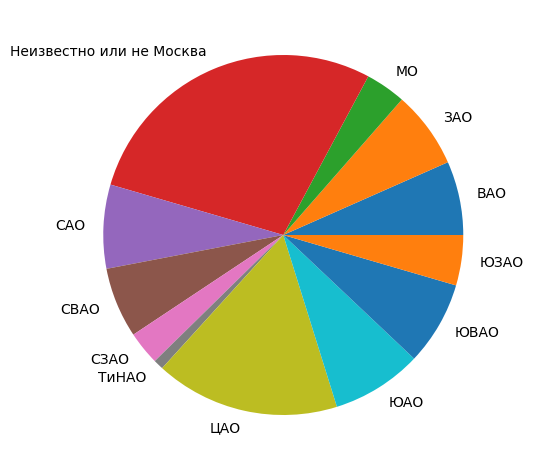

In [6]:
x = metro_counts["count"]
y = metro_counts["Округ"]

fig_metro, ax_metro = plt.subplots()
ax_metro.pie(for_pie["count"], labels=for_pie.index)
plt.tight_layout()
fig_metro.savefig('./figures/Распределение по округам.svg', dpi=300, bbox_inches="tight")
;

## Анализ распределения цены аренды
### Формирование данных

In [7]:
prices = df["Цена"].copy()


def get_price(string):
    if isinstance(string, str):
        str_list = string.split()
        return int(round(float(str_list[0]))) // 1000
    else:
        return string


prices_int = prices.map(get_price)

### Построение распределения в виде гистограммы

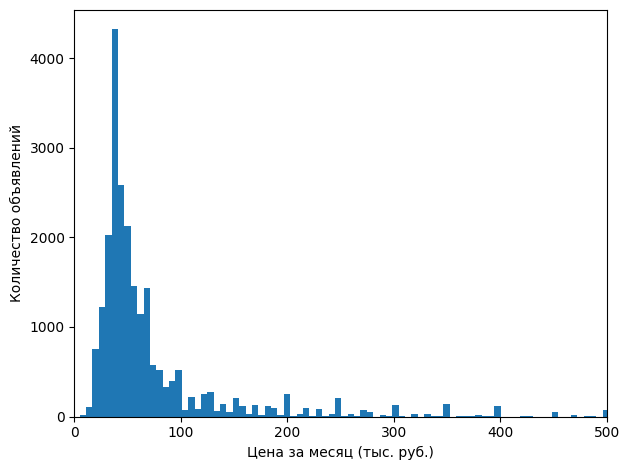

In [8]:
fig_pr, ax_pr = plt.subplots()

ax_pr.hist(prices_int, bins=500)
ax_pr.set_xlabel("Цена за месяц (тыс. руб.)")
ax_pr.set_ylabel("Количество объявлений")
ax_pr.set_xlim((0, 500))
plt.tight_layout()
fig_pr.savefig("./figures/Распределение цены.svg", dpi=300, bbox_inches="tight")

## Анализ распределения площади квартир в объявлениях
### Формирование данных

In [175]:
area = df["Площадь, м2"].copy()


def get_area(string):
    if isinstance(string, str):
        total_area_str = string[: string.find("/")]
        return round(float(total_area_str), 1)
    else:
        return string


area_int = area.map(get_area)

### Построение распределения

''

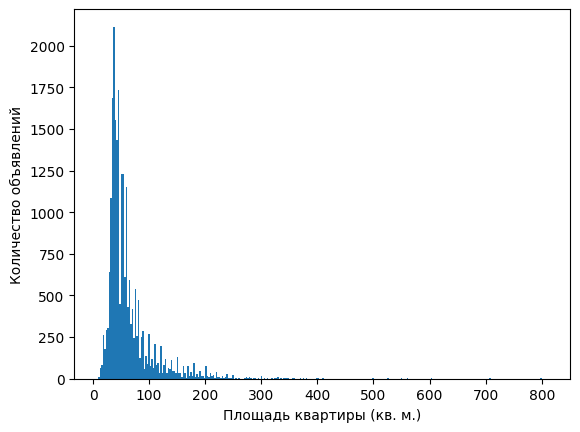

In [ ]:
fig_ar, ax_ar = plt.subplots()

ax_ar.hist(area_int, bins=300)
ax_ar.set_xlabel('Площадь квартиры (кв. м.)')
ax_ar.set_ylabel('Количество объявлений')
fig_ar.savefig('./figures/Распределение площади.svg', dpi=300, bbox_inches="tight")
;

## Анализ категории "Парковки": доля подземных относительно общего кол-ва

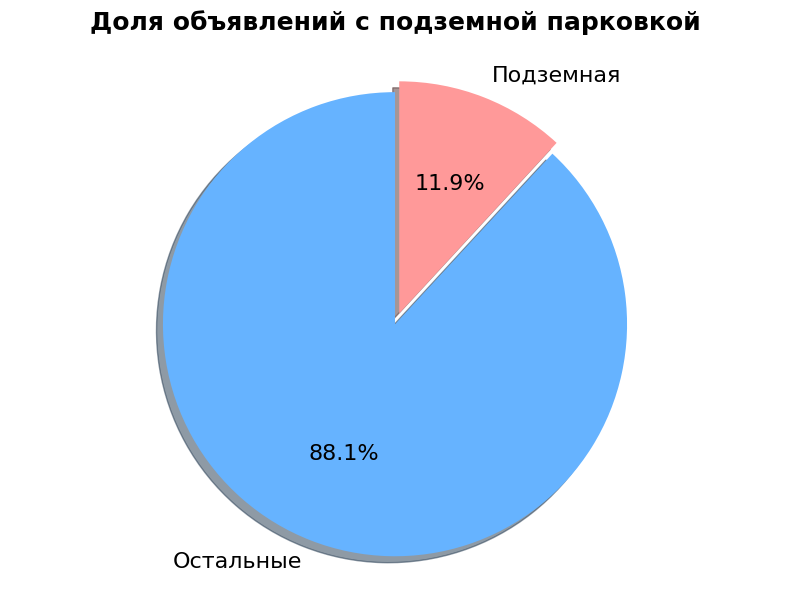

In [ ]:
# Разделяем на "Подземная" и "Другие"
df["Тип парковки"] = df["Парковка"].apply(
    lambda x: "Подземная" if x == "подземная" else "Остальные"
)

# Считаем количество
counts = df["Тип парковки"].value_counts()

# Цвета (можно изменить)
colors = ["#66b3ff", "#ff9999"]
explode = (0.05, 0)  # Выделяем "Подземную" парковку

# Строим круговую диаграмму
plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,  # Тень для объема
    textprops={"fontsize": 16},  # Размер текста в процентах
)

# Добавляем заголовок
plt.title(
    "Доля объявлений с подземной парковкой",
    fontsize=18,
    pad=20,  # Отступ заголовка
    fontweight="bold",
)

# Убираем оси
plt.axis("equal")

plt.tight_layout()  # Автоматическая настройка отступов
plt.savefig("./figures/Доля объявлений с подземной парковкой.svg")
plt.show()

## Анализ квартир по категории "Можно с детьми/животными"

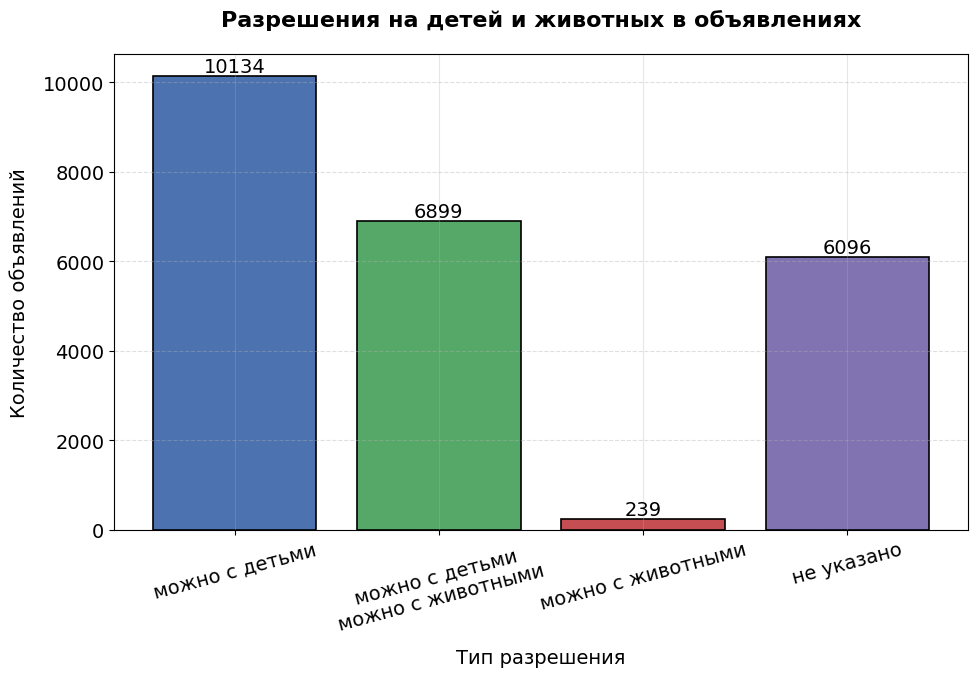

In [ ]:
# Создаем фигуру
plt.figure(figsize=(10, 7))

# Устанавливаем стиль
plt.style.use("default")
plt.rcParams["font.size"] = 14
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3

# Анализируем данные
categories = {
    "можно с детьми": df["Можно с детьми/животными"].str.contains(
        "можно с детьми", case=False, na=False
    )
    & ~df["Можно с детьми/животными"].str.contains(
        "можно с животными", case=False, na=False
    ),
    "можно с детьми\nможно с животными": df["Можно с детьми/животными"].str.contains(
        "можно с детьми.*можно с животными|можно с животными.*можно с детьми",
        case=False,
        na=False,
    ),
    "можно с животными": df["Можно с детьми/животными"].str.contains(
        "можно с животными", case=False, na=False
    )
    & ~df["Можно с детьми/животными"].str.contains(
        "можно с детьми", case=False, na=False
    ),
    "не указано": df["Можно с детьми/животными"].isna(),
}

# Считаем количество
counts = {k: v.sum() for k, v in categories.items()}
names = list(counts.keys())
values = list(counts.values())

# Цветовая палитра
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]

# Создаем гистограмму
bars = plt.bar(names, values, color=colors, edgecolor="black", linewidth=1.2)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.5,
        f"{height}",
        ha="center",
        va="bottom",
    )

# Настраиваем график
plt.title(
    "Разрешения на детей и животных в объявлениях",
    pad=20,
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Тип разрешения", labelpad=10)
plt.ylabel("Количество объявлений", labelpad=10)
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Улучшаем отображение
plt.tight_layout()
plt.savefig("./figures/Разрешения на детей и животных в объявлениях.svg")
plt.show()

## Анализ распределение пропусков в датафрейме

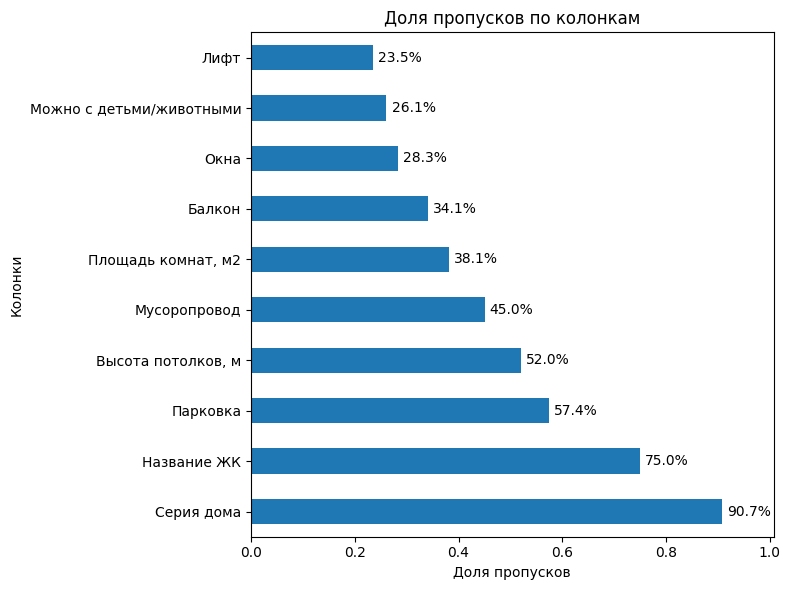

In [9]:
missing = df.isna().mean().sort_values(ascending=False)
dups = df.duplicated().sum()
const_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]

ax = missing.head(10).plot(kind="barh", figsize=(8, 6))

plt.style.use("default")
plt.title("Доля пропусков по колонкам")
plt.xlabel("Доля пропусков")
plt.ylabel("Колонки")

for p in ax.patches:
    value = p.get_width()
    ax.text(
        value + 0.01, p.get_y() + p.get_height() / 2, f"{value*100:.1f}%", va="center"
    )

# делаем место справа для текста
ax.set_xlim(0, missing.head(10).max() + 0.1)
plt.tight_layout()
plt.savefig("./figures/Доля пропусков по колонкам.svg")

plt.show()

## Анализ распределения квартир по городам
### Подготовка датафрейма

In [180]:
def get_city(address):
    if "Москва" in address:
        return "Москва"
    elif "Санкт-Петербург" in address:
        return "Санкт-Петербург"
    elif "Сочи" in address:
        return "Сочи"
    else:
        return "Другое"


df_with_city = df.copy()
df_with_city["City"] = df_with_city["Адрес"].fillna("").apply(get_city)
city_counts = df_with_city["City"].value_counts()
total = city_counts.sum()

### Построение графика

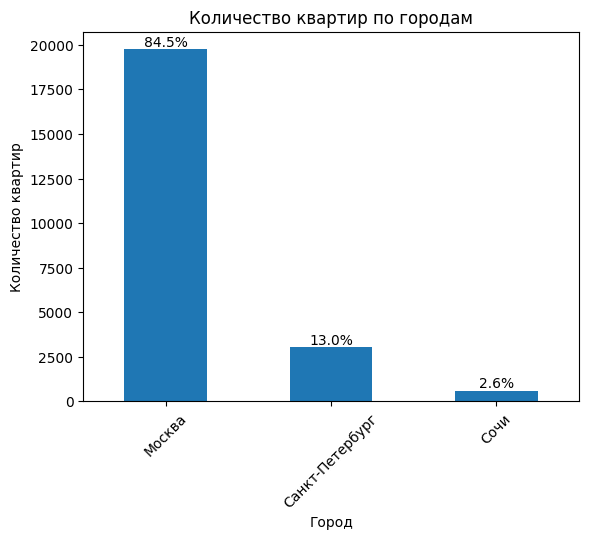

In [ ]:
city_counts.plot(kind="bar")
for i, count in enumerate(city_counts.values):
    percent = 100 * count / total
    plt.text(i, count, f"{percent:.1f}%", ha="center", va="bottom")
plt.title("Количество квартир по городам")
plt.xlabel("Город")
plt.xticks(rotation=45)
plt.ylabel("Количество квартир")
plt.savefig("./figures/Количество квартир по городам.svg")
plt.show()

## Анализ распределения объявлений по валюте, в которой указана цена
### Формирование данных

In [182]:
def get_currency(price):
    if "$" in price:
        return "Доллар"
    elif "€" in price:
        return "Евро"
    elif " руб." in price:
        return "Рубль"
    else:
        return "Другое"


df_with_currency = df.copy()
df_with_currency["Currency"] = df_with_currency["Цена"].fillna("").apply(get_currency)
currency_counts = df_with_currency["Currency"].value_counts()
total = currency_counts.sum()

### Пострение графика

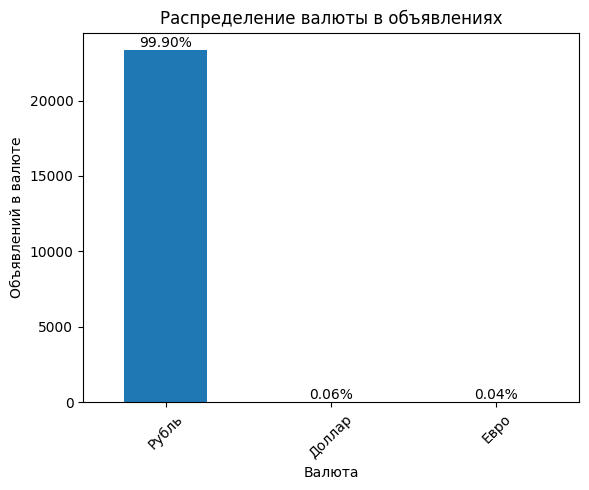

In [ ]:
currency_counts.plot(kind="bar")
for i, count in enumerate(currency_counts.values):
    percent = 100 * count / total
    plt.text(i, count, f"{percent:.2f}%", ha="center", va="bottom")
plt.title("Распределение валюты в объявлениях")
plt.xlabel("Валюта")
plt.xticks(rotation=45)
plt.ylabel("Объявлений в валюте")
plt.savefig("./figures/Распределение валюты в объявлениях.svg")
plt.show()

## Анализ распределения квартир в объявлениях по количеству комнат

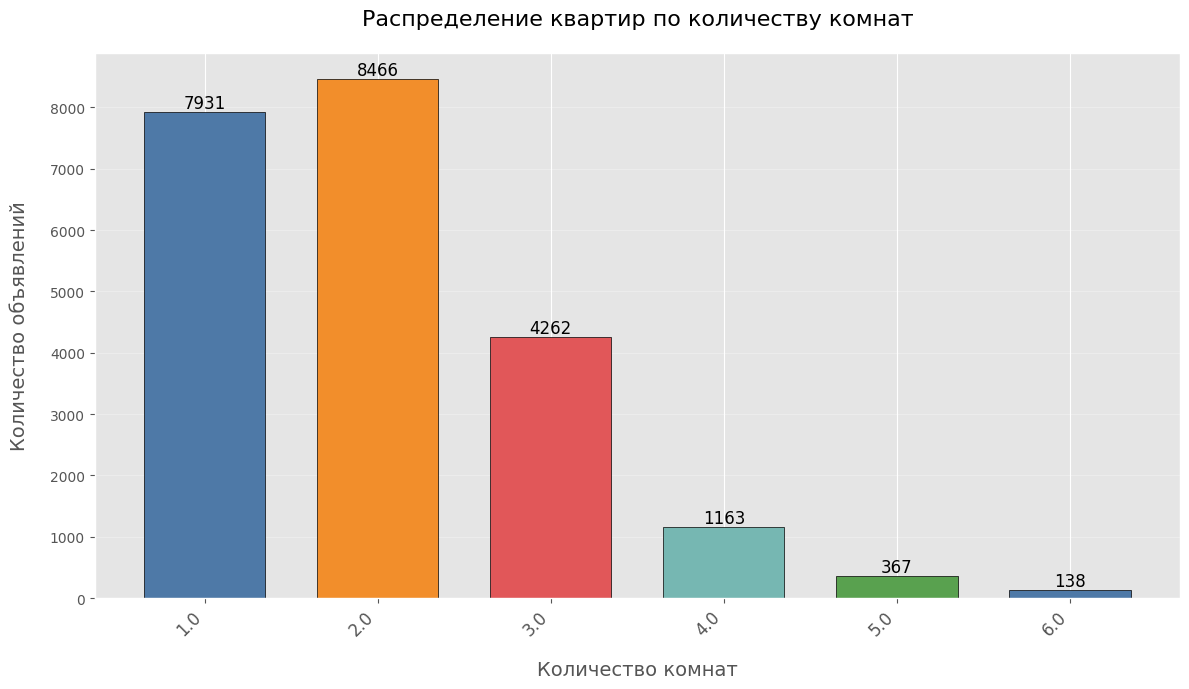

In [ ]:
# Функция для извлечения первой цифры
def extract_first_number(text):
    if pd.isna(text):
        return None
    for char in str(text):
        if char.isdigit():
            return int(char)
    return None


# Создаем фигуру с правильными отступами
plt.figure(figsize=(12, 7))
plt.subplots_adjust(bottom=0.2)  # Место для подписей

# Извлекаем количество комнат
df["Число комнат"] = df["Количество комнат"].apply(extract_first_number)
room_counts = df["Число комнат"].value_counts().sort_index()

# Стилизация
plt.style.use("ggplot")
colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f"]

# Рисуем столбцы
bars = plt.bar(
    room_counts.index.astype(str),
    room_counts.values,
    color=colors,
    edgecolor="black",
    width=0.7,
)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=12,
    )

# Настройка осей
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Количество комнат", labelpad=15, fontsize=14)
plt.ylabel("Количество объявлений", labelpad=15, fontsize=14)
plt.title("Распределение квартир по количеству комнат", pad=20, fontsize=16)

# Сетка и оформление
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("./figures/Распределение квартир по количеству комнат.svg")
plt.show()